In [1]:
using Optim, PyPlot

import Formatting
include("jlFiles/printmat.jl")
include("jlFiles/garch11LL.jl")

garch11LLLoss (generic function with 1 method)

In [2]:
xx   = readdlm("Data/FFdSizePs.csv",',',header=true)
x    = xx[1]
ymd  = x[:,1]     #[YearMonthDay]
y    = x[:,2]     #returns for the size portfolio we want to study

yx = [y[2:end] y[1:end-1] ones(size(y,1)-1,1)]     #y(t),y(t-1),1
y  = yx[:,1]
x  = yx[:,2:3]

8324×2 Array{Float64,2}:
 -1.18  1.0
 -1.37  1.0
  1.73  1.0
  0.77  1.0
  1.41  1.0
  0.68  1.0
  1.26  1.0
  0.61  1.0
  1.11  1.0
  0.63  1.0
  0.64  1.0
  0.37  1.0
  0.49  1.0
  ⋮        
 -0.52  1.0
 -0.3   1.0
  0.18  1.0
  1.13  1.0
  1.11  1.0
 -0.11  1.0
  0.58  1.0
 -0.53  1.0
 -0.57  1.0
 -0.45  1.0
 -0.35  1.0
 -0.34  1.0

In [3]:
#mean equation, y = x'b
#GARCH(1,1) equation: s2(t) = alfa0 + alfa1*u(t-1)^2 + beta1*s2(t-1)


par0 = [0;mean(y,1);(var(y,1)/5);0.1;0.6]
(loglik,s2,yhat) = garch11LL(par0,yx)            #just testing the log lik

Sol = optimize(par->garch11LLLoss(par,yx),par0)   #do MLE by optimization with optimize, minimize -sum(LL)

ParHat = Optim.minimizer(Sol)
ParHat[end-2:end] = abs(ParHat[end-2:end])        #since the likelihood function uses abs(these values)

println("\nParameter estimates: ")
printmat(ParHat)


Parameter estimates: 
     0.256
     0.049
     0.014
     0.162
     0.824



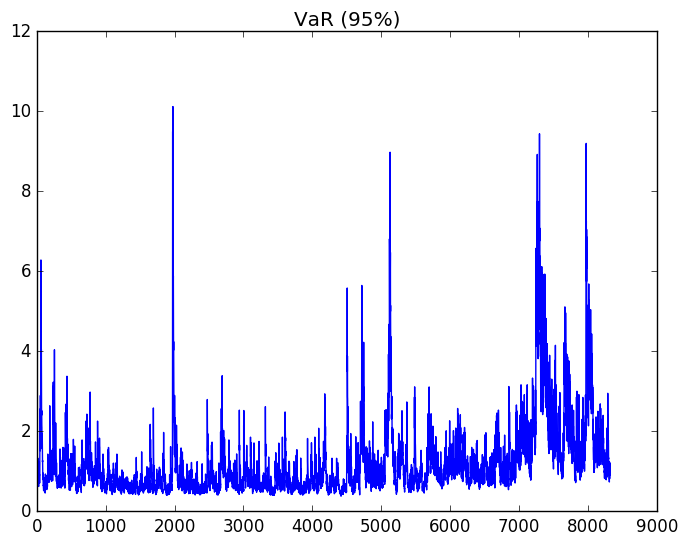


Coverage ratio for VaR(95%): 0.059


In [4]:
(loglik,s2,ER) = garch11LL(ParHat,yx)
VaR95          = -(ER - 1.64*sqrt(s2))

figure()
  plot(VaR95)
  title("VaR (95%)")
show()

CovRatio = mean((-y) .>= VaR95)                          #coverage ratio for VaR
println("\nCoverage ratio for VaR(95%): ",round(CovRatio,3))